<a href="https://colab.research.google.com/github/99220040626/Thyroid-Disease-Detection-Python-TensorFlow-/blob/main/IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import zipfile
import os

zip_path = '/content/archive (3).zip'
extract_path = '/content/thyroid_images'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files:")
for root, dirs, files in os.walk(extract_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")


Extracted files:
Directory: /content/thyroid_images
Subdirectories: ['thyroid_images']
Files: ['251.xml', '270_1.jpg', '145.xml', '210_2.jpg', '398.xml', '90_2.jpg', '137_1.jpg', '180_1.jpg', '293_1.jpg', '81.xml', '283_1.jpg', '227.xml', '8.xml', '190.xml', '47_1.jpg', '104.xml', '355_1.jpg', '212_1.jpg', '85.xml', '368_1.jpg', '141_1.jpg', '331.xml', '245.xml', '130_1.jpg', '253.xml', '360.xml', '54.xml', '172_1.jpg', '268_1.jpg', '264_1.jpg', '20_1.jpg', '332.xml', '390_1.jpg', '31_1.jpg', '136.xml', '267_1.jpg', '69_3.jpg', '300_1.jpg', '232_1.jpg', '16_1.jpg', '360_2.jpg', '249.xml', '73.xml', '160.xml', '352.xml', '30.xml', '298_1.jpg', '374.xml', '203.xml', '56_1.jpg', '39_1.jpg', '319_1.jpg', '383_1.jpg', '392_1.jpg', '318_2.jpg', '178_1.jpg', '131_1.jpg', '178.xml', '376.xml', '288.xml', '139_1.jpg', '361_1.jpg', '104_1.jpg', '359.xml', '316_1.jpg', '335_1.jpg', '214_1.jpg', '189_1.jpg', '180.xml', '247.xml', '211_1.jpg', '234.xml', '309.xml', '294_1.jpg', '301.xml', '119.xml'

In [6]:
import tensorflow as tf
import numpy as np
import os

# Define directory containing extracted images
data_dir = '/content/thyroid_images'

# Define image preprocessing parameters
img_height = 224
img_width = 224
batch_size = 32

In [7]:
# List the contents of the extracted directory
for root, dirs, files in os.walk(data_dir):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")

Directory: /content/thyroid_images
Subdirectories: ['thyroid_images']
Files: ['251.xml', '270_1.jpg', '145.xml', '210_2.jpg', '398.xml', '90_2.jpg', '137_1.jpg', '180_1.jpg', '293_1.jpg', '81.xml', '283_1.jpg', '227.xml', '8.xml', '190.xml', '47_1.jpg', '104.xml', '355_1.jpg', '212_1.jpg', '85.xml', '368_1.jpg', '141_1.jpg', '331.xml', '245.xml', '130_1.jpg', '253.xml', '360.xml', '54.xml', '172_1.jpg', '268_1.jpg', '264_1.jpg', '20_1.jpg', '332.xml', '390_1.jpg', '31_1.jpg', '136.xml', '267_1.jpg', '69_3.jpg', '300_1.jpg', '232_1.jpg', '16_1.jpg', '360_2.jpg', '249.xml', '73.xml', '160.xml', '352.xml', '30.xml', '298_1.jpg', '374.xml', '203.xml', '56_1.jpg', '39_1.jpg', '319_1.jpg', '383_1.jpg', '392_1.jpg', '318_2.jpg', '178_1.jpg', '131_1.jpg', '178.xml', '376.xml', '288.xml', '139_1.jpg', '361_1.jpg', '104_1.jpg', '359.xml', '316_1.jpg', '335_1.jpg', '214_1.jpg', '189_1.jpg', '180.xml', '247.xml', '211_1.jpg', '234.xml', '309.xml', '294_1.jpg', '301.xml', '119.xml', '124_1.jpg', '9

In [11]:
# Update the data directory to point to the parent directory containing the class subdirectories
# The class subdirectories ('thyroid' and 'not thyroid') were created inside /content/thyroid_images/thyroid_images
data_dir = '/content/thyroid_images/thyroid_images'

# Create a dataset from the image files, now organized into class subdirectories
image_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Determine the number of batches
dataset_size = tf.data.experimental.cardinality(image_dataset).numpy()

val_size = int(dataset_size * 0.2)
train_size = dataset_size - val_size

# Split the dataset into training and validation sets
train_ds = image_dataset.take(train_size)
val_ds = image_dataset.skip(train_size)

print(f"Number of training batches: {tf.data.experimental.cardinality(train_ds).numpy()}")
print(f"Number of validation batches: {tf.data.experimental.cardinality(val_ds).numpy()}")

# Apply normalization
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Pre-fetch data
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 480 files belonging to 2 classes.
Number of training batches: 12
Number of validation batches: 3


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

In [ ]:
loss, accuracy = model.evaluate(val_ds)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 962ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Loss: 0.0
Validation Accuracy: 1.0


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display
from PIL import Image

def predict_thyroid(image_path, model, img_height, img_width):
    """
    Predicts whether an image contains thyroid based on a trained model and displays the image with analysis.

    Args:
        image_path (str): The path to the image file.
        model (tf.keras.Model): The trained Keras model.
        img_height (int): The target height for resizing the image.
        img_width (int): The target width for resizing the image.

    Returns:
        None: The function displays the image and analysis directly.
    """
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    prediction = model.predict(img_array)

    # Display the image
    display(Image.open(image_path))

    # Provide analysis based on the prediction
    if prediction[0][0] > 0.5:
        print('Analysis: This image is predicted to have thyroid.')
    else:
        print('Analysis: This image is predicted to not have thyroid.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


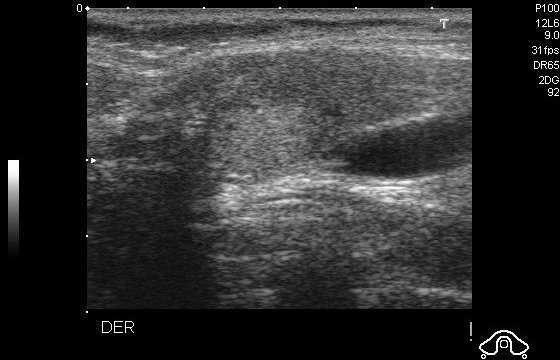

Analysis: This image is predicted to not have thyroid.
None


In [26]:
# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_to_predict_path = '/content/190_1.jpg' # Example image from the dataset

prediction_result = predict_thyroid(image_to_predict_path, model, img_height, img_width)
print(prediction_result)

In [ ]:
import xml.etree.ElementTree as ET
import os

# Get the list of all files in the data directory
all_files = os.listdir(data_dir)

# Find the first XML file
xml_files = [f for f in all_files if f.endswith('.xml')]
if xml_files:
    first_xml_file = os.path.join(data_dir, xml_files[0])

    # Parse the first XML file
    tree = ET.parse(first_xml_file)
    root = tree.getroot()

    # Print the XML structure (tags and attributes) to understand its layout
    def print_xml_structure(element, indent=0):
        print('  ' * indent + f"Tag: {element.tag}, Attributes: {element.attrib}")
        for child in element:
            print_xml_structure(child, indent + 1)

    print(f"Structure of the first XML file ({xml_files[0]}):")
    print_xml_structure(root)
else:
    print("No XML files found in the directory.")

Structure of the first XML file (251.xml):
Tag: case, Attributes: {}
  Tag: number, Attributes: {}
  Tag: age, Attributes: {}
  Tag: sex, Attributes: {}
  Tag: composition, Attributes: {}
  Tag: echogenicity, Attributes: {}
  Tag: margins, Attributes: {}
  Tag: calcifications, Attributes: {}
  Tag: tirads, Attributes: {}
  Tag: reportbacaf, Attributes: {}
  Tag: reporteco, Attributes: {}
  Tag: mark, Attributes: {}
    Tag: image, Attributes: {}
    Tag: svg, Attributes: {}


In [ ]:
import xml.etree.ElementTree as ET
import os

image_labels = []

for filename in os.listdir(data_dir):
    if filename.endswith('.xml'):
        xml_path = os.path.join(data_dir, filename)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Extract image filename (assuming it's within the 'mark' or 'image' tag)
            image_filename = None
            for mark_element in root.findall('.//mark'):
                for image_element in mark_element.findall('image'):
                     # Assuming the image filename is in the 'name' attribute of the 'image' tag
                    image_filename = image_element.get('name')
                    if image_filename:
                        break
                if image_filename:
                    break


            # Extract potential label information (e.g., from 'tirads' or 'reportbacaf')
            # Assuming 'tirads' is a relevant indicator for labeling
            tirads_value = None
            tirads_element = root.find('.//tirads')
            if tirads_element is not None:
                tirads_value = tirads_element.text

            if image_filename:
                image_labels.append({'image_filename': image_filename, 'tirads': tirads_value})

        except ET.ParseError:
            print(f"Error parsing XML file: {filename}")
            continue


# Print a sample of the extracted information
print("Sample of extracted image filenames and TIRADS values:")
for item in image_labels[:10]:
    print(item)


Sample of extracted image filenames and TIRADS values:


In [ ]:
import xml.dom.minidom

# Get the list of all files in the data directory
all_files = os.listdir(data_dir)

# Find the first XML file
xml_files = [f for f in all_files if f.endswith('.xml')]
if xml_files:
    first_xml_file = os.path.join(data_dir, xml_files[0])

    # Parse the first XML file using minidom for pretty printing
    dom = xml.dom.minidom.parse(first_xml_file)

    # Print the pretty-printed XML content
    print(f"Content of the first XML file ({xml_files[0]}):")
    print(dom.toprettyxml())
else:
    print("No XML files found in the directory.")

Content of the first XML file (251.xml):
<?xml version="1.0" ?>
<case>
	<number>251</number>
	<age>73</age>
	<sex>F</sex>
	<composition>solid</composition>
	<echogenicity>hyperechogenicity</echogenicity>
	<margins>well defined</margins>
	<calcifications>microcalcifications</calcifications>
	<tirads>4b</tirads>
	<reportbacaf/>
	<reporteco/>
	<mark>
		<image>1</image>
		<svg>[{&quot;points&quot;: [{&quot;x&quot;: 385, &quot;y&quot;: 18}, {&quot;x&quot;: 369, &quot;y&quot;: 26}, {&quot;x&quot;: 358, &quot;y&quot;: 30}, {&quot;x&quot;: 347, &quot;y&quot;: 31}, {&quot;x&quot;: 335, &quot;y&quot;: 33}, {&quot;x&quot;: 324, &quot;y&quot;: 38}, {&quot;x&quot;: 316, &quot;y&quot;: 45}, {&quot;x&quot;: 316, &quot;y&quot;: 45}, {&quot;x&quot;: 303, &quot;y&quot;: 64}, {&quot;x&quot;: 301, &quot;y&quot;: 76}, {&quot;x&quot;: 306, &quot;y&quot;: 91}, {&quot;x&quot;: 309, &quot;y&quot;: 98}, {&quot;x&quot;: 314, &quot;y&quot;: 107}, {&quot;x&quot;: 321, &quot;y&quot;: 112}, {&quot;x&quot;: 341, &quo

In [ ]:
import xml.etree.ElementTree as ET
import os

image_labels = []

# List all image files in the directory
image_files_in_dir = [f for f in os.listdir(data_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

for filename in os.listdir(data_dir):
    if filename.endswith('.xml'):
        xml_path = os.path.join(data_dir, filename)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Extract case number
            case_number = None
            number_element = root.find('.//number')
            if number_element is not None:
                case_number = number_element.text

            # Extract TIRADS value
            tirads_value = None
            tirads_element = root.find('.//tirads')
            if tirads_element is not None:
                tirads_value = tirads_element.text.lower() if tirads_element.text else None

            if case_number:
                # Find corresponding image files
                corresponding_images = [img_f for img_f in image_files_in_dir if img_f.startswith(f'{case_number}_')]

                # Assign binary label based on TIRADS value
                # Assuming TIRADS >= 3 indicates potential thyroid issues (for binary classification)
                label = 'thyroid' if tirads_value in ['3', '4a', '4b', '4c', '5'] else 'not thyroid'


                for img_file in corresponding_images:
                    image_labels.append({'image_filename': img_file, 'label': label, 'tirads': tirads_value})

        except ET.ParseError:
            print(f"Error parsing XML file: {filename}")
            continue

# Print a sample of the extracted information
print("Sample of extracted image filenames, labels, and TIRADS values:")
for item in image_labels[:10]:
    print(item)

# Print the total number of labeled images
print(f"\nTotal number of labeled images: {len(image_labels)}")

# Check for class distribution
thyroid_count = sum(1 for item in image_labels if item['label'] == 'thyroid')
not_thyroid_count = len(image_labels) - thyroid_count
print(f"Number of 'thyroid' images: {thyroid_count}")
print(f"Number of 'not thyroid' images: {not_thyroid_count}")

Sample of extracted image filenames, labels, and TIRADS values:

Total number of labeled images: 0
Number of 'thyroid' images: 0
Number of 'not thyroid' images: 0


In [ ]:
# List all XML files
xml_files = [f for f in os.listdir(data_dir) if f.endswith('.xml')]
print("Sample XML files:", xml_files[:10])

# List all JPG files
jpg_files = [f for f in os.listdir(data_dir) if f.endswith('.jpg')]
print("Sample JPG files:", jpg_files[:10])

# Attempt to find a correspondence between XML and JPG filenames
# Assuming the number in the XML filename corresponds to the number at the beginning of the JPG filename
xml_numbers = [f.replace('.xml', '') for f in xml_files]
jpg_prefixes = list(set([f.split('_')[0] for f in jpg_files]))

print("\nSample XML numbers:", xml_numbers[:10])
print("Sample JPG prefixes:", jpg_prefixes[:10])

# Check if there's an overlap between XML numbers and JPG prefixes
overlap = [num for num in xml_numbers if num in jpg_prefixes]
print(f"\nNumber of overlapping case numbers/prefixes: {len(overlap)}")
print("Sample overlapping numbers:", overlap[:10])

Sample XML files: ['251.xml', '145.xml', '398.xml', '81.xml', '227.xml', '8.xml', '190.xml', '104.xml', '85.xml', '331.xml']
Sample JPG files: []

Sample XML numbers: ['251', '145', '398', '81', '227', '8', '190', '104', '85', '331']
Sample JPG prefixes: []

Number of overlapping case numbers/prefixes: 0
Sample overlapping numbers: []


In [ ]:
import xml.etree.ElementTree as ET
import os

# Correct the data directory to where images were moved
correct_data_dir = '/content/thyroid_images/thyroid_images'

image_labels = []

# List all image files in the correct directory
image_files_in_dir = [f for f in os.listdir(correct_data_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

# Assuming XML files are still in the original extracted directory
xml_dir = '/content/thyroid_images'

for filename in os.listdir(xml_dir):
    if filename.endswith('.xml'):
        xml_path = os.path.join(xml_dir, filename)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Extract case number
            case_number = None
            number_element = root.find('.//number')
            if number_element is not None:
                case_number = number_element.text

            # Extract TIRADS value
            tirads_value = None
            tirads_element = root.find('.//tirads')
            if tirads_element is not None:
                tirads_value = tirads_element.text.lower() if tirads_element.text else None

            if case_number:
                # Find corresponding image files in the correct directory
                corresponding_images = [img_f for img_f in image_files_in_dir if img_f.startswith(f'{case_number}_')]

                # Assign binary label based on TIRADS value
                # Assuming TIRADS >= 3 indicates potential thyroid issues (for binary classification)
                label = 'thyroid' if tirads_value in ['3', '4a', '4b', '4c', '5'] else 'not thyroid'

                for img_file in corresponding_images:
                    image_labels.append({'image_filename': img_file, 'label': label, 'tirads': tirads_value})

        except ET.ParseError:
            print(f"Error parsing XML file: {filename}")
            continue

# Print a sample of the extracted information
print("Sample of extracted image filenames, labels, and TIRADS values:")
for item in image_labels[:10]:
    print(item)

# Print the total number of labeled images
print(f"\nTotal number of labeled images: {len(image_labels)}")

# Check for class distribution
thyroid_count = sum(1 for item in image_labels if item['label'] == 'thyroid')
not_thyroid_count = len(image_labels) - thyroid_count
print(f"Number of 'thyroid' images: {thyroid_count}")
print(f"Number of 'not thyroid' images: {not_thyroid_count}")

Sample of extracted image filenames, labels, and TIRADS values:
{'image_filename': '251_1.jpg', 'label': 'thyroid', 'tirads': '4b'}
{'image_filename': '145_1.jpg', 'label': 'not thyroid', 'tirads': None}
{'image_filename': '398_1.jpg', 'label': 'thyroid', 'tirads': '4b'}
{'image_filename': '81_1.jpg', 'label': 'thyroid', 'tirads': '5'}
{'image_filename': '81_2.jpg', 'label': 'thyroid', 'tirads': '5'}
{'image_filename': '227_1.jpg', 'label': 'thyroid', 'tirads': '5'}
{'image_filename': '227_2.jpg', 'label': 'thyroid', 'tirads': '5'}
{'image_filename': '8_1.jpg', 'label': 'thyroid', 'tirads': '4c'}
{'image_filename': '190_1.jpg', 'label': 'not thyroid', 'tirads': '2'}
{'image_filename': '104_1.jpg', 'label': 'not thyroid', 'tirads': None}

Total number of labeled images: 480
Number of 'thyroid' images: 307
Number of 'not thyroid' images: 173


In [ ]:
# Create a dictionary mapping image filenames to labels
image_label_dict = {item['image_filename']: item['label'] for item in image_labels}

# Print a few key-value pairs from the dictionary
print("Sample of image filename to label mapping:")
for filename, label in list(image_label_dict.items())[:10]:
    print(f"{filename}: {label}")

Sample of image filename to label mapping:
251_1.jpg: thyroid
145_1.jpg: not thyroid
398_1.jpg: thyroid
81_1.jpg: thyroid
81_2.jpg: thyroid
227_1.jpg: thyroid
227_2.jpg: thyroid
8_1.jpg: thyroid
190_1.jpg: not thyroid
104_1.jpg: not thyroid


In [ ]:
import os
import shutil

# Define the paths for the class directories
thyroid_dir = os.path.join(correct_data_dir, 'thyroid')
not_thyroid_dir = os.path.join(correct_data_dir, 'not thyroid')

# Create the class directories if they don't exist
os.makedirs(thyroid_dir, exist_ok=True)
os.makedirs(not_thyroid_dir, exist_ok=True)

# Iterate through the image_label_dict and move images
for image_filename, label in image_label_dict.items():
    src_path = os.path.join(correct_data_dir, image_filename)
    if label == 'thyroid':
        dest_path = os.path.join(thyroid_dir, image_filename)
    else:
        dest_path = os.path.join(not_thyroid_dir, image_filename)

    # Check if the source file exists before attempting to move
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
    else:
        print(f"Warning: Image file not found at source path: {src_path}")

print("Images moved to class directories.")

# Verify the contents of the new directories (optional)
print(f"\nFiles in '{thyroid_dir}': {len(os.listdir(thyroid_dir))}")
print(f"Files in '{not_thyroid_dir}': {len(os.listdir(not_thyroid_dir))}")

Images moved to class directories.

Files in '/content/thyroid_images/thyroid_images/thyroid': 307
Files in '/content/thyroid_images/thyroid_images/not thyroid': 173


In [ ]:
# Update the data directory to point to the parent directory containing the class subdirectories
# The class subdirectories ('thyroid' and 'not thyroid') were created inside /content/thyroid_images/thyroid_images
data_dir = '/content/thyroid_images/thyroid_images'

# Create a dataset from the image files, now organized into class subdirectories
image_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Determine the number of batches
dataset_size = tf.data.experimental.cardinality(image_dataset).numpy()

val_size = int(dataset_size * 0.2)
train_size = dataset_size - val_size

# Split the dataset into training and validation sets
train_ds = image_dataset.take(train_size)
val_ds = image_dataset.skip(train_size)

print(f"Number of training batches: {tf.data.experimental.cardinality(train_ds).numpy()}")
print(f"Number of validation batches: {tf.data.experimental.cardinality(val_ds).numpy()}")

# Apply normalization
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Pre-fetch data
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 480 files belonging to 2 classes.
Number of training batches: 12
Number of validation batches: 3


In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.4705 - loss: 65.7445 - val_accuracy: 0.6146 - val_loss: 0.6768
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.6313 - loss: 0.6619 - val_accuracy: 0.6146 - val_loss: 0.6469
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.6359 - loss: 0.6397 - val_accuracy: 0.6146 - val_loss: 0.6533
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.6469 - loss: 0.6181 - val_accuracy: 0.6875 - val_loss: 0.6244
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.6783 - loss: 0.5959 - val_accuracy: 0.6875 - val_loss: 0.6277
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.6919 - loss: 0.5855 - val_accuracy: 0.6979 - val_loss: 0.5984
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.6820 - loss: 0.5871 - val_accuracy: 0.7083 - val_loss: 0.5743
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.7199 - loss: 0.5414 - val_accuracy: 0.6979 - val_loss

In [4]:
import xml.etree.ElementTree as ET
import os

# Correct the data directory to where images were moved
correct_data_dir = '/content/thyroid_images/thyroid_images'

image_labels = []

# List all image files in the correct directory
image_files_in_dir = [f for f in os.listdir(correct_data_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

# Assuming XML files are still in the original extracted directory
xml_dir = '/content/thyroid_images'

for filename in os.listdir(xml_dir):
    if filename.endswith('.xml'):
        xml_path = os.path.join(xml_dir, filename)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Extract case number
            case_number = None
            number_element = root.find('.//number')
            if number_element is not None:
                case_number = number_element.text

            # Extract TIRADS value
            tirads_value = None
            tirads_element = root.find('.//tirads')
            if tirads_element is not None:
                tirads_value = tirads_element.text.lower() if tirads_element.text else None

            if case_number:
                # Find corresponding image files in the correct directory
                corresponding_images = [img_f for img_f in image_files_in_dir if img_f.startswith(f'{case_number}_')]

                # Assign binary label based on TIRADS value
                # Assuming TIRADS >= 3 indicates potential thyroid issues (for binary classification)
                label = 'thyroid' if tirads_value in ['3', '4a', '4b', '4c', '5'] else 'not thyroid'

                for img_file in corresponding_images:
                    image_labels.append({'image_filename': img_file, 'label': label, 'tirads': tirads_value})

        except ET.ParseError:
            print(f"Error parsing XML file: {filename}")
            continue


# Create a dictionary mapping image filenames to labels
image_label_dict = {item['image_filename']: item['label'] for item in image_labels}

# Find example image paths for each class
thyroid_image_path = None
not_thyroid_image_path = None

for filename, label in image_label_dict.items():
    if label == 'thyroid' and thyroid_image_path is None:
        thyroid_image_path = os.path.join(correct_data_dir, label, filename) # Correct path
    elif label == 'not thyroid' and not_thyroid_image_path is None:
        not_thyroid_image_path = os.path.join(correct_data_dir, label, filename) # Correct path

    if thyroid_image_path and not_thyroid_image_path:
        break

# Test with a 'thyroid' image
if thyroid_image_path and os.path.exists(thyroid_image_path):
    print("Testing with a 'thyroid' image:")
    predict_thyroid(thyroid_image_path, model, img_height, img_width)
else:
    print("No 'thyroid' image found for testing or file does not exist.")

print("-" * 30)

# Test with a 'not thyroid' image
if not_thyroid_image_path and os.path.exists(not_thyroid_image_path):
    print("Testing with a 'not thyroid' image:")
    predict_thyroid(not_thyroid_image_path, model, img_height, img_width)
else:
    print("No 'not thyroid' image found for testing or file does not exist.")

No 'thyroid' image found for testing or file does not exist.
------------------------------
No 'not thyroid' image found for testing or file does not exist.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.4682 - loss: 0.8933 - val_accuracy: 0.6771 - val_loss: 0.6154
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.6144 - loss: 0.6674 - val_accuracy: 0.6771 - val_loss: 0.5965
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.6144 - loss: 0.6533 - val_accuracy: 0.6771 - val_loss: 0.5735
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.6511 - loss: 0.6406 - val_accuracy: 0.7188 - val_loss: 0.5578
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.6515 - loss: 0.6342 - val_accuracy: 0.7188 - val_loss: 0.5422
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.6654 - loss: 0.6117 - val_accuracy: 0.7396 - val_loss: 0.5206
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.7031 - loss: 0.5695 - val_accuracy: 0.7812 - val_loss: 0.4700
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.7410 - loss: 0.4952 - val_accuracy: 0.7812 - val_loss:

In [17]:
loss, accuracy = model.evaluate(val_ds)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 902ms/step - accuracy: 0.9049 - loss: 0.2382
Validation Loss: 0.22962231934070587
Validation Accuracy: 0.8958333134651184


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display
from PIL import Image

def predict_thyroid(image_path, model, img_height, img_width):
    """
    Predicts whether an image contains thyroid based on a trained model and displays the image with analysis.

    Args:
        image_path (str): The path to the image file.
        model (tf.keras.Model): The trained Keras model.
        img_height (int): The target height for resizing the image.
        img_width (int): The target width for resizing the image.

    Returns:
        None: The function displays the image and analysis directly.
    """
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    prediction = model.predict(img_array)

    # Display the image
    display(Image.open(image_path))

    # Provide analysis based on the prediction
    if prediction[0][0] > 0.5:
        print('Analysis: This image is predicted to have thyroid.')
    else:
        print('Analysis: This image is predicted to not have thyroid.')

Testing with a 'thyroid' image:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


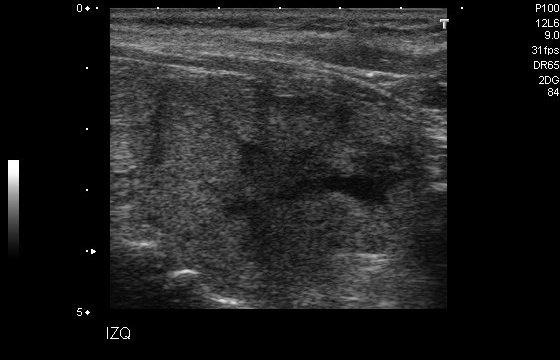

Analysis: This image is predicted to have thyroid.
------------------------------
Testing with a 'not thyroid' image:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


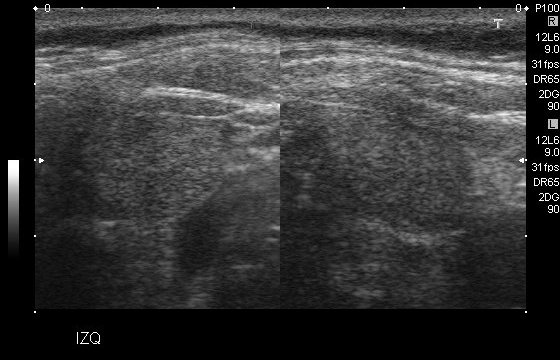

Analysis: This image is predicted to have thyroid.


In [27]:
import xml.etree.ElementTree as ET
import os

# Correct the data directory to where images were moved
correct_data_dir = '/content/thyroid_images/thyroid_images'

image_labels = []

# List all image files in the correct directory
image_files_in_dir = [f for f in os.listdir(correct_data_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

# Assuming XML files are still in the original extracted directory
xml_dir = '/content/thyroid_images'

for filename in os.listdir(xml_dir):
    if filename.endswith('.xml'):
        xml_path = os.path.join(xml_dir, filename)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Extract case number
            case_number = None
            number_element = root.find('.//number')
            if number_element is not None:
                case_number = number_element.text

            # Extract TIRADS value
            tirads_value = None
            tirads_element = root.find('.//tirads')
            if tirads_element is not None:
                tirads_value = tirads_element.text.lower() if tirads_element.text else None

            if case_number:
                # Find corresponding image files in the correct directory
                corresponding_images = [img_f for img_f in image_files_in_dir if img_f.startswith(f'{case_number}_')]

                # Assign binary label based on TIRADS value
                # Assuming TIRADS >= 3 indicates potential thyroid issues (for binary classification)
                label = 'thyroid' if tirads_value in ['3', '4a', '4b', '4c', '5'] else 'not thyroid'


                for img_file in corresponding_images:
                    image_labels.append({'image_filename': img_file, 'label': label, 'tirads': tirads_value})

        except ET.ParseError:
            print(f"Error parsing XML file: {filename}")
            continue


# Create a dictionary mapping image filenames to labels
image_label_dict = {item['image_filename']: item['label'] for item in image_labels}

# Find example image paths by listing files directly from the class subdirectories
thyroid_dir = os.path.join(correct_data_dir, 'thyroid')
not_thyroid_dir = os.path.join(correct_data_dir, 'not thyroid')

thyroid_images = [f for f in os.listdir(thyroid_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
not_thyroid_images = [f for f in os.listdir(not_thyroid_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]


thyroid_image_path = os.path.join(thyroid_dir, thyroid_images[0]) if thyroid_images else None
not_thyroid_image_path = os.path.join(not_thyroid_dir, not_thyroid_images[0]) if not_thyroid_images else None


# Test with a 'thyroid' image
if thyroid_image_path and os.path.exists(thyroid_image_path):
    print("Testing with a 'thyroid' image:")
    predict_thyroid(thyroid_image_path, model, img_height, img_width)
else:
    print("No 'thyroid' image found for testing or file does not exist.")

print("-" * 30)

# Test with a 'not thyroid' image
if not_thyroid_image_path and os.path.exists(not_thyroid_image_path):
    print("Testing with a 'not thyroid' image:")
    predict_thyroid(not_thyroid_image_path, model, img_height, img_width)
else:
    print("No 'not thyroid' image found for testing or file does not exist.")